In [ ]:
!pip install scratchai-nightly  # for adversarial attack
!pip install torchvision==0.9.1 # deep learning models
!pip install flashtorch         # visualization based on activation maximization 
!pip install mapextrackt        # visualization of neural network saliency map

In [ ]:
# suppress error
import logging as logging
import sys as sys
logging.disable(sys.maxsize) 

# import the library
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from scratchai import *

from flashtorch.activmax import GradientAscent
from MapExtrackt import FeatureExtractor
from torch.distributions import Normal


# set parameters
moon_light_path = 'input_images/moon.png' #moon light image path
#true_class = 920 # imagenet id for traffic light

# function handle to get prediction more easily
def get_prediction(image, model):
    #assumes img and net are datasets and models trained using imagenet dataset  
    confidences = model(image.unsqueeze(0))
    class_idx = torch.argmax(confidences, dim=1).item()
    class_label = datasets.labels.imagenet_labels[class_idx]
    return class_label, confidences[0, class_idx].item(), class_idx

**Making prediction**

In [ ]:
# load and preprocess the moon image
img = imgutils.load_img(moon_light_path)
img = imgutils.get_trf('rz256_cc224_tt_normimgnet')(img) #normalize and reshape the input image

net = models.resnet18(pretrained=True).eval()  # load resnet

# use the provided get_prediction function to predict the class of the moon image
class_label, confidences, class_idx = get_prediction(img, net)
print(f"Prediction: {class_label}")
print(f"Confidence: {confidences}")

Prediction: car mirror
Confidence: 8.991569519042969


**Random Perturbation**

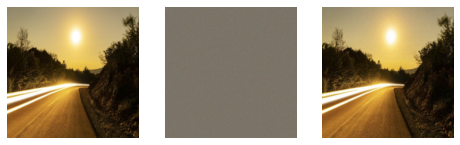

Prediction: car mirror
Confidence: 9.305150985717773
Class index: 475


In [ ]:
epsilon = 0.1 # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling

noisy_img = attacks.noise(img, epsilon) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

class_label, confidences, class_idx = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function

imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

print(f"Prediction: {class_label}")
print(f"Confidence: {confidences}")
print(f"Class index: {class_idx}")

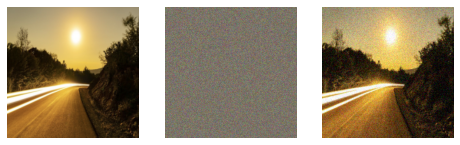

Prediction: fountain
Confidence: 8.205039024353027
Class index: 562


In [ ]:
epsilon = 0.5 # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling

noisy_img = attacks.noise(img, epsilon) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

class_label, confidences, class_idx = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function

imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

print(f"Prediction: {class_label}")
print(f"Confidence: {confidences}")
print(f"Class index: {class_idx}")

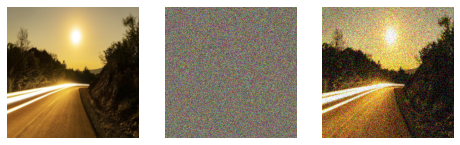

Prediction: trombone
Confidence: 7.181666851043701
Class index: 875


In [ ]:
epsilon = 1 # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling

noisy_img = attacks.noise(img, epsilon) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

class_label, confidences, class_idx = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function

imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

print(f"Prediction: {class_label}")
print(f"Confidence: {confidences}")
print(f"Class index: {class_idx}")

**FGM Attack**

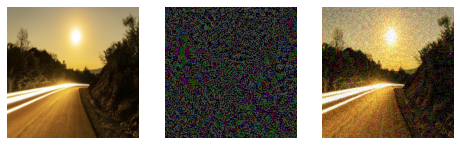

Prediction: ('fountain', 9.272138595581055)
Confidence: 5.943540573120117


In [ ]:
# Untargeted attack to ResNet-18 with FGM

images, true_labels, predicted_labels = one_call.attack(moon_light_path, atk=attacks.FGM, nstr='resnet18', ret=True) # perform FGM attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

print(f"Prediction: {predicted_labels}") # show predicted labels

_, confidences, _= get_prediction(images[2], net)
print(f"Confidence: {confidences}")

**PGD Attack**

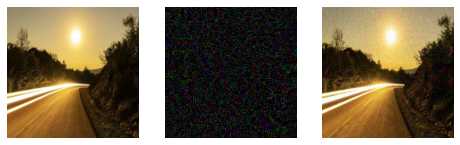

Prediction: ('traffic light, traffic signal, stoplight', 22.625442504882812)
Confidence: 12.620070457458496


In [ ]:
# Targeted attack to ResNet-18 with PGD

target_class = 920 # imagenet id for traffic light
images, true_labels, predicted_labels = one_call.attack(moon_light_path, atk=attacks.PGD, y=target_class, nstr='resnet18', ret=True) # perform PGD attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

print(f"Prediction: {predicted_labels}") # show predicted labels

_, confidences, _= get_prediction(images[2], net)
print(f"Confidence: {confidences}")

Targeted PGD attack on the image captured by the RGB camera mounted on the vehicle could be used to fool the vehicle autopilot system to recognise the yellowish tint of the moon in the evening sky as a yellow traffic light!